In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("HR-Employee-Attrition.csv")
print("Data Loaded Successfully\n")

Data Loaded Successfully



In [6]:
print("----- Dataset Info -----")
print(df.info())

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [7]:
print("\n----- Missing Values -----")
print(df.isnull().sum())

print("\n----- Statistical Summary -----")
print(df.describe())

print("\n----- Column Names -----")
print(df.columns)


----- Missing Values -----
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

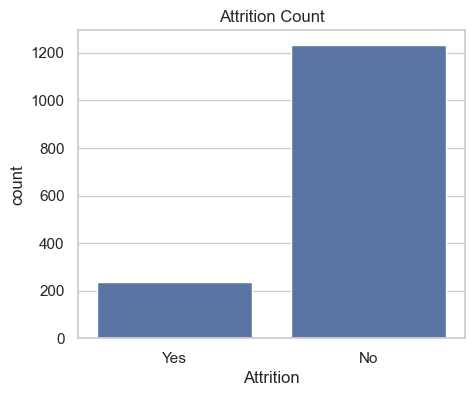

In [7]:
# 1. Attrition Count
plt.figure(figsize=(5,4))
sns.countplot(x=df['Attrition'])
plt.title("Attrition Count")
plt.show()

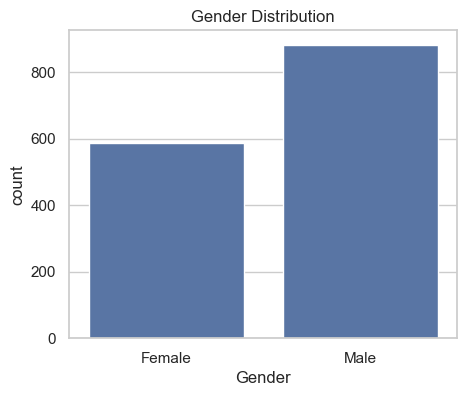

In [8]:
# 2. Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df['Gender'])
plt.title("Gender Distribution")
plt.show()

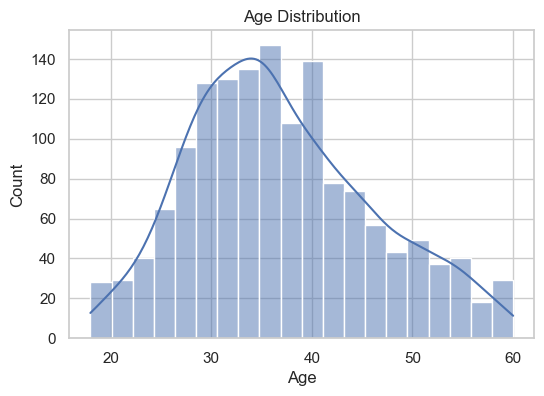

In [9]:
# 3. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

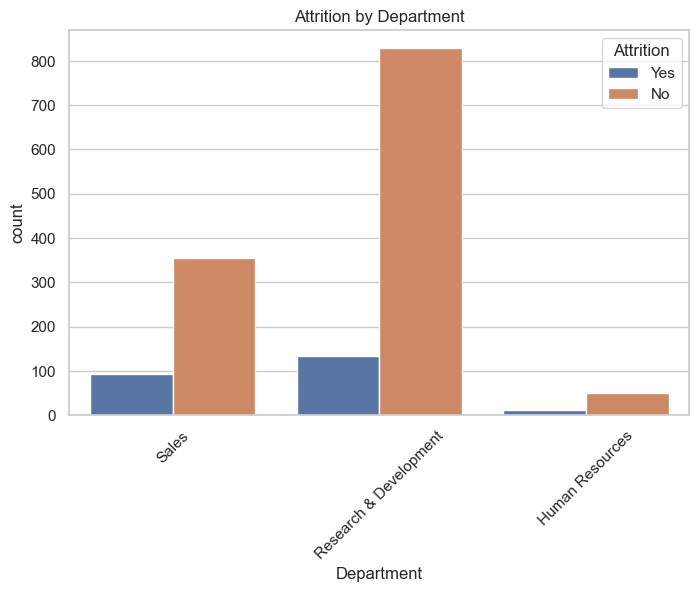

In [10]:
# 4. Attrition by Department
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

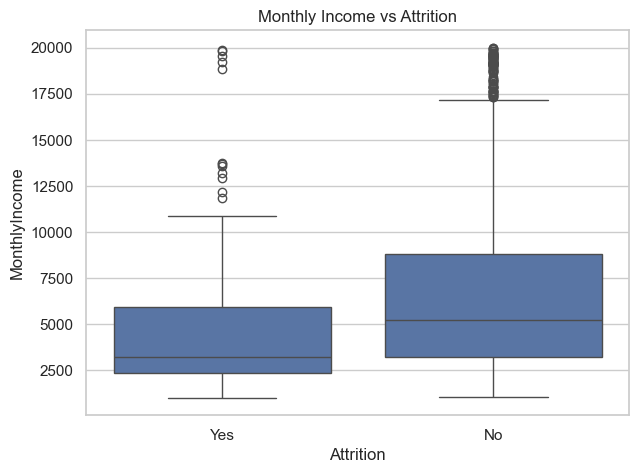

In [11]:
# 5. Monthly Income vs Attrition
plt.figure(figsize=(7,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

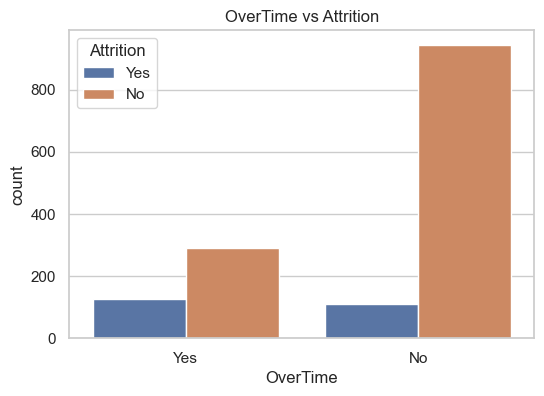

In [12]:
# 6. OverTime vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()

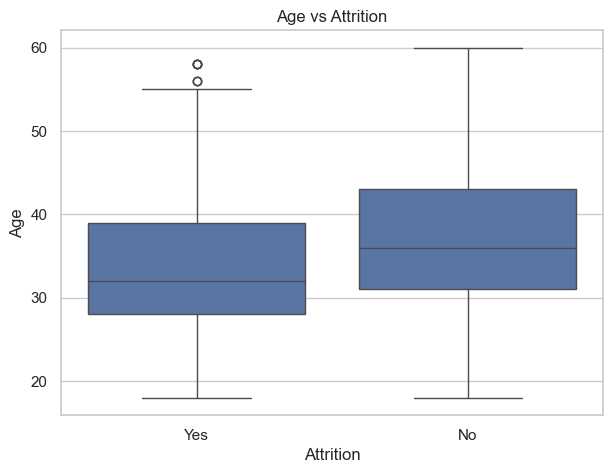

In [13]:
# 7. Age vs Attrition
plt.figure(figsize=(7,5))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()


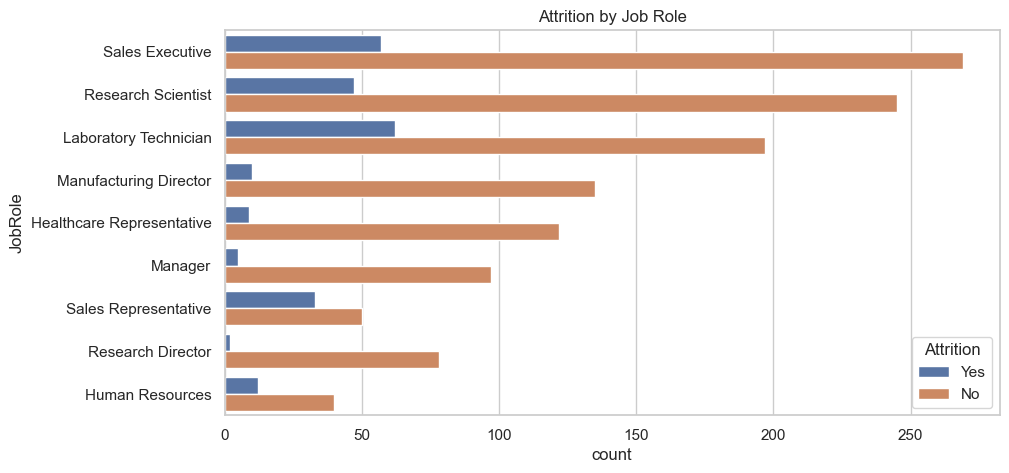

In [14]:
# 8. Job Role vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.show()

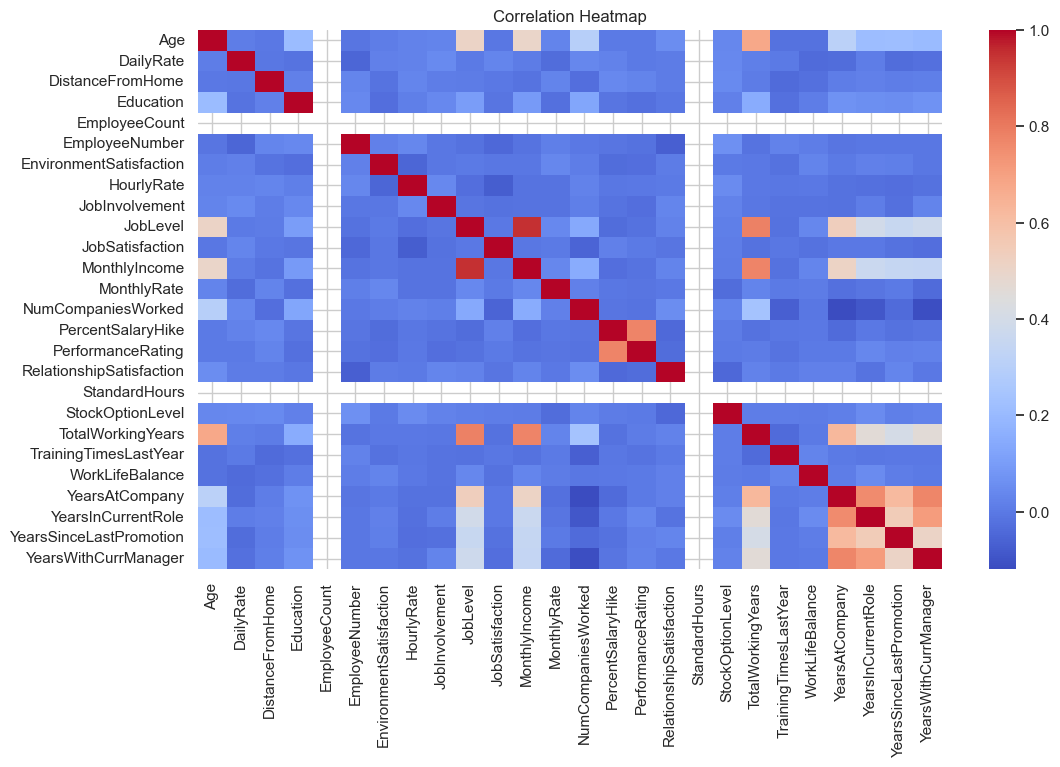

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Matrix
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(),
            annot=False,
            cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
print("\n----- Key Insights -----")

print("\nAverage Monthly Income by Attrition:")
print(df.groupby('Attrition')['MonthlyIncome'].mean())

print("\nAverage Age by Attrition:")
print(df.groupby('Attrition')['Age'].mean())

print("\nOverTime Attrition Breakdown:")
print(df.groupby(['OverTime','Attrition']).size())

print("\nDepartment-wise Attrition:")
print(df.groupby(['Department','Attrition']).size())


----- Key Insights -----

Average Monthly Income by Attrition:
Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

Average Age by Attrition:
Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

OverTime Attrition Breakdown:
OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
dtype: int64

Department-wise Attrition:
Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
dtype: int64


In [17]:
df.to_csv("cleaned_hr_employee_attrition.csv", index=False)
print("✅ Cleaned dataset exported successfully!")


✅ Cleaned dataset exported successfully!
